error:  0.0155


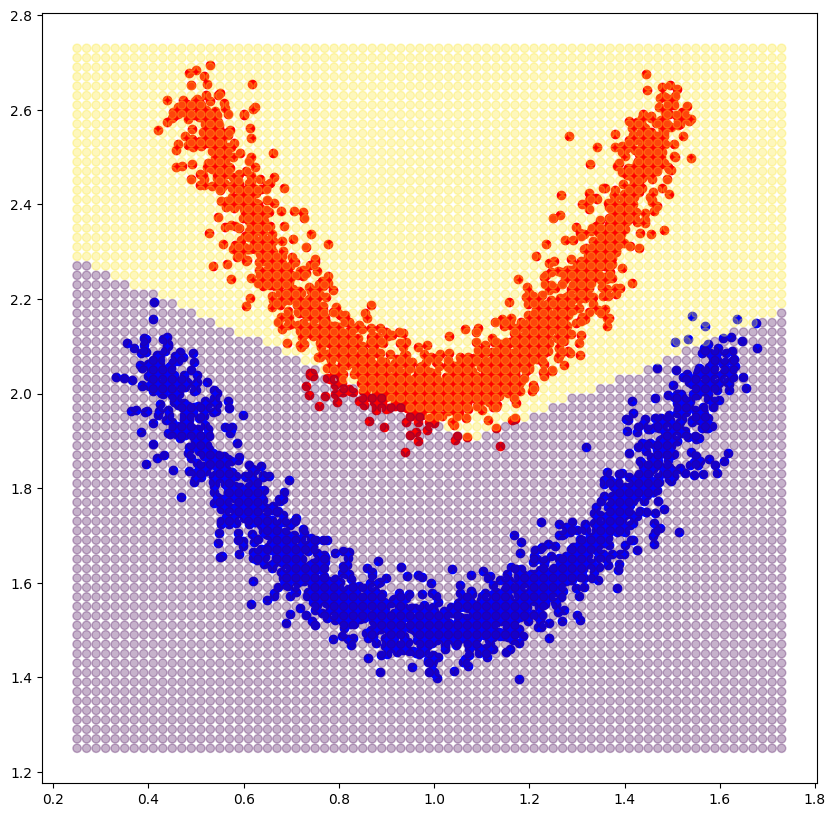

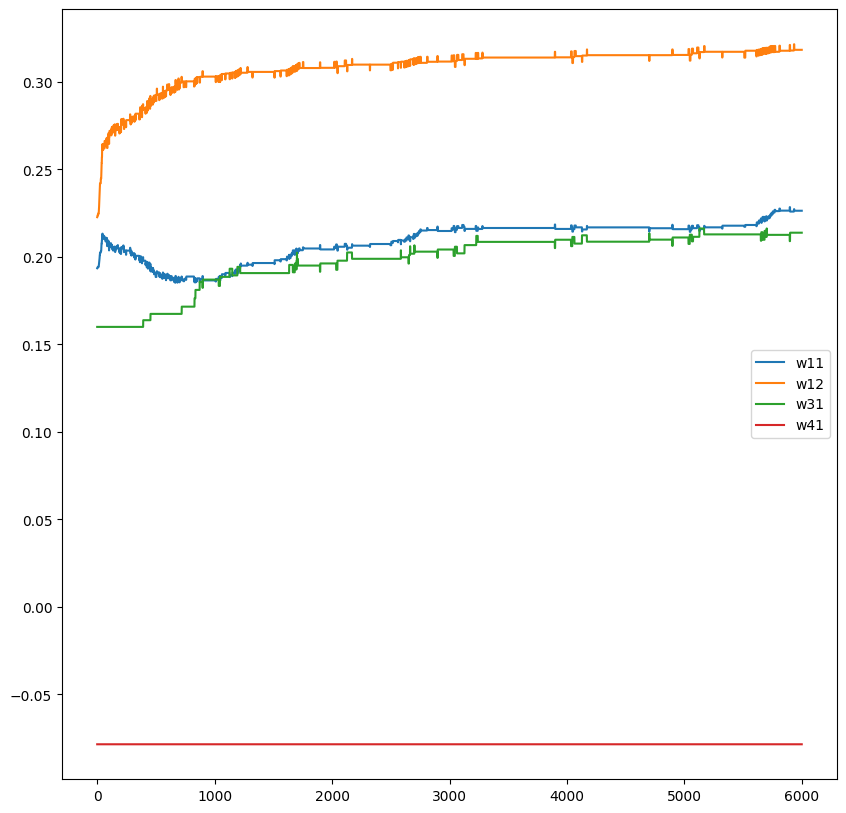

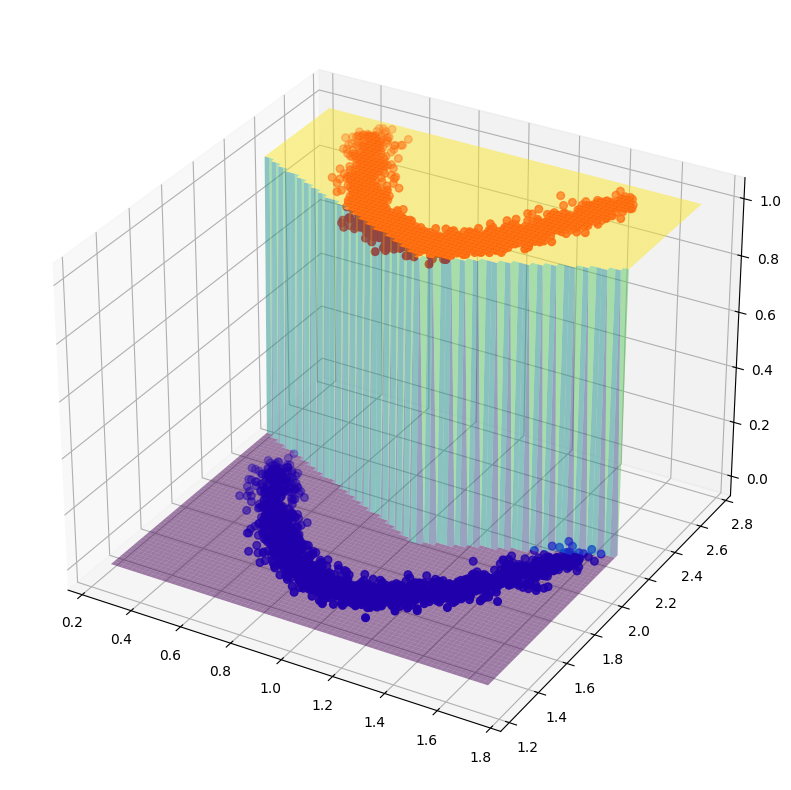

In [16]:
import numpy as np  # Import the NumPy library for numerical operations
import random  # Import the random module for generating random numbers
import matplotlib.pyplot as plt  # Import pyplot module from matplotlib for plotting
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D from mpl_toolkits.mplot3d for 3D plotting

####################### Parabolic Clusters ###########################
##################### Synthetic Data Creation #########################
nData = 2000  # Number of points in each cluster
nTrain = 1000  # Number of training points
nEpoch = 6  # Number of training epochs
nTest = 2000  # Number of test points
alpha = 0.008  # Step size (learning rate)
std = 0.5  # Standard deviation of the distance of points

n_errorloop = 50  # Number of times error is less than 0.05
nSuccess = 0

# Pre-allocate for the input and the target vector
x = np.zeros((2 * nData, 2))
t = np.zeros((2 * nData))

# Generate random distances and angles
r = np.random.normal(0, std, 2 * nData)
theta = 2 * np.pi * np.random.rand(2 * nData)

# Initialize weight arrays for tracking during training
w11f = np.zeros(nEpoch * nTrain)
w12f = np.zeros(nEpoch * nTrain)
w13f = np.zeros(nEpoch * nTrain)
w14f = np.zeros(nEpoch * nTrain)

# Generate the first cluster
h = -6 + 12 * np.random.rand(nData)
v = 5 + (h ** 2) / 6
x[0:nData, 0] = h + r[0:nData] * np.cos(theta[0:nData])
x[0:nData, 1] = v + r[0:nData] * np.sin(theta[0:nData])
t[0:nData] = 0

# Generate the second cluster
h = -5 + 10 * np.random.rand(nData)
v = 10 + (h ** 2) / 4
x[nData:2 * nData, 0] = h + r[nData:2 * nData] * np.cos(theta[nData:2 * nData])
x[nData:2 * nData, 1] = v + r[nData:2 * nData] * np.sin(theta[nData:2 * nData])
t[nData:2 * nData] = 1

####################### Normalization ################################
x[:, 0] = 1 + 0.1 * x[:, 0]
x[:, 1] = 1 + 0.1 * x[:, 1]

#################### Parameter Initialization #########################
#########################################################################
# Initialize weights and biases for the neural network
w11 = 0.5 - np.random.rand()
w12 = 0.5 - np.random.rand()
w21 = 0.5 - np.random.rand()
w22 = 0.5 - np.random.rand()
w31 = 0.5 - np.random.rand()
w32 = 0.5 - np.random.rand()
w41 = 0.5 - np.random.rand()
w42 = 0.5 - np.random.rand()

b1 = 0.5 - np.random.rand()
b2 = 0.5 - np.random.rand()
b3 = 0.5 - np.random.rand()
b4 = 0.5 - np.random.rand()

ww1 = 0.5 - np.random.rand()
ww2 = 0.5 - np.random.rand()
ww3 = 0.5 - np.random.rand()
ww4 = 0.5 - np.random.rand()

bb = 0.5 - np.random.rand()

# Create an array of indexes for random selection of data for training and testing
a = range(0, 2 * nData)
sp = random.sample(a, nTrain + nTest)  # Indexes for random selection of data for training and testing

########################### Training #####################################
#########################################################################
p = 0
for epoch in range(nEpoch):  # Loop over each epoch
    for i in range(nTrain):  # Loop over each training point
        y1 = b1 + w11 * x[sp[i], 0] + w12 * x[sp[i], 1]
        y2 = b2 + w21 * x[sp[i], 0] + w22 * x[sp[i], 1]
        y3 = b3 + w31 * x[sp[i], 0] + w32 * x[sp[i], 1]
        y4 = b4 + w41 * x[sp[i], 0] + w42 * x[sp[i], 1]
        
        # Rectified activation
        dxx1 = y1 > 0
        xx1 = y1 * dxx1
        dxx2 = y2 > 0
        xx2 = y2 * dxx2
        dxx3 = y3 > 0
        xx3 = y3 * dxx3
        dxx4 = y4 > 0
        xx4 = y4 * dxx4
        
        yy = bb + ww1 * xx1 + ww2 * xx2 + ww3 * xx3 + ww4 * xx4
        yy = yy > 0
        
        e = t[sp[i]] - yy
        
        # Update weights using gradient descent
        ww1 += alpha * e * xx1
        ww2 += alpha * e * xx2
        ww3 += alpha * e * xx3
        ww4 += alpha * e * xx4

        bb += alpha * e
        
        w11 += alpha * e * ww1 * dxx1 * x[sp[i], 0]
        w12 += alpha * e * ww1 * dxx1 * x[sp[i], 1]
        w21 += alpha * e * ww2 * dxx2 * x[sp[i], 0]
        w22 += alpha * e * ww2 * dxx2 * x[sp[i], 1]
        w31 += alpha * e * ww3 * dxx3 * x[sp[i], 0]
        w32 += alpha * e * ww3 * dxx3 * x[sp[i], 1]
        w41 += alpha * e * ww4 * dxx4 * x[sp[i], 0]
        w42 += alpha * e * ww4 * dxx4 * x[sp[i], 1]
        
        b1 += alpha * e * ww1 * dxx1
        b2 += alpha * e * ww2 * dxx2
        b3 += alpha * e * ww3 * dxx3
        b4 += alpha * e * ww4 * dxx4
        
        # Store weights for plotting
        w11f[p] = w11
        w12f[p] = w12
        w13f[p] = w31
        w14f[p] = w41
        p += 1

######################## Testing ######################################
#########################################################################
err = 0
for i in range(nTrain, nTrain + nTest):  # Loop over each test point
    y1 = b1 + w11 * x[sp[i], 0] + w12 * x[sp[i], 1]
    y2 = b2 + w21 * x[sp[i], 0] + w22 * x[sp[i], 1]
    y3 = b3 + w31 * x[sp[i], 0] + w32 * x[sp[i], 1]
    y4 = b4 + w41 * x[sp[i], 0] + w42 * x[sp[i], 1]
    
    # Rectified activation
    dxx1 = y1 > 0
    xx1 = y1 * dxx1
    dxx2 = y2 > 0
    xx2 = y2 * dxx2
    dxx3 = y3 > 0
    xx3 = y3 * dxx3
    dxx4 = y4 > 0
    xx4 = y4 * dxx4
    
    yy = bb + ww1 * xx1 + ww2 * xx2 + ww3 * xx3 + ww4 * xx4
    yy = yy > 0
    
    e = abs(t[sp[i]] - yy)
    err += e

err /= nTest  # Calculate the average error

print("error: ",err)

########################## Plotting Part ##############################
if err < 0.05:  # Plot if error is less than 0.05
    plt.figure(figsize=(10, 10))
    plt.scatter(x[0:nData, 0], x[0:nData, 1], c='blue')
    plt.scatter(x[nData:2 * nData, 0], x[nData:2 * nData, 1], c='red')

    X = np.arange(0.25, 1.75, 0.02)
    Y = np.arange(1.25, 2.75, 0.02)
    X, Y = np.meshgrid(X, Y)

    y1 = b1 + w11 * X + w12 * Y
    y2 = b2 + w21 * X + w22 * Y
    y3 = b3 + w31 * X + w32 * Y
    y4 = b4 + w41 * X + w42 * Y

    dxx1 = y1 > 0
    xx1 = y1 * dxx1
    dxx2 = y2 > 0
    xx2 = y2 * dxx2
    dxx3 = y3 > 0
    xx3 = y3 * dxx3
    dxx4 = y4 > 0
    xx4 = y4 * dxx4

    yy = bb + ww1 * xx1 + ww2 * xx2 + ww3 * xx3 + ww4 * xx4
    Z = yy > 0

    plt.scatter(X, Y, c=Z, alpha=0.3)

    plt.figure(figsize=(10, 10))
    f = np.arange(0, nEpoch * nTrain, 1)
    plt.plot(f, w11f, label='w11')
    plt.plot(f, w12f, label='w12')
    plt.plot(f, w13f, label='w31')  # New weight tracking
    plt.plot(f, w14f, label='w41')  # New weight tracking
    plt.legend()

    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.scatter(x[0:nData, 0], x[0:nData, 1], 0, c='blue', s=30)
    ax.scatter(x[nData:2 * nData, 0], x[nData:2 * nData, 1], 1, c='red', s=30)

    # Plotting the separating planes
    X = np.arange(0.25, 1.75, 0.02)  # Shorter X-range for visibility
    Y = np.arange(1.25, 2.75, 0.02)
    X, Y = np.meshgrid(X, Y)

    y1 = b1 + w11 * X + w12 * Y
    y2 = b2 + w21 * X + w22 * Y
    y3 = b3 + w31 * X + w32 * Y
    y4 = b4 + w41 * X + w42 * Y

    dxx1 = y1 > 0
    xx1 = y1 * dxx1
    dxx2 = y2 > 0
    xx2 = y2 * dxx2
    dxx3 = y3 > 0
    xx3 = y3 * dxx3
    dxx4 = y4 > 0
    xx4 = y4 * dxx4

    yy = bb + ww1 * xx1 + ww2 * xx2 + ww3 * xx3 + ww4 * xx4
    Z = yy > 0

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', alpha=0.5)

plt.show()
